In [22]:
from google.colab import drive
drive.mount('/content/drive')
lookup = dict()
reverselookup = dict()
count = 0
for j in os.listdir('drive/MyDrive/leapGestRecog/00/'):
        lookup[j] = count
        reverselookup[count] = j
        count = count + 1
lookup

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


{'03_fist': 0,
 '04_fist_moved': 1,
 '06_index': 2,
 '09_c': 3,
 '10_down': 4,
 '07_ok': 5,
 '01_palm': 6,
 '02_l': 7,
 '08_palm_moved': 8,
 '05_thumb': 9}

In [23]:
import numpy as np 
import os 
from PIL import Image 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [24]:
x_data = []
y_data = []
datacount = 0 # We'll use this to tally how many images are in our dataset
for i in range(0, 10): # Loop over the ten top-level folders
    for j in os.listdir('drive/MyDrive/leapGestRecog/0' + str(i) + '/'):
        if not j.startswith('.'): # Again avoid hidden folders
            count = 0 # To tally images of a given gesture
            for k in os.listdir('drive/MyDrive/leapGestRecog/0' + 
                                str(i) + '/' + j + '/'):
                                # Loop over the images
                img = Image.open('drive/MyDrive/leapGestRecog/0' + 
                                 str(i) + '/' + j + '/' + k).convert('L')
                                # Read in and convert to greyscale
                img = img.resize((320, 120))
                arr = np.array(img)
                x_data.append(arr) 
                count = count + 1
            y_values = np.full((count, 1), lookup[j]) 
            y_data.append(y_values)
            datacount = datacount + count
x_data = np.array(x_data, dtype = 'float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount, 1) # Reshape to be the correct size


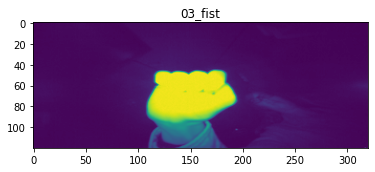

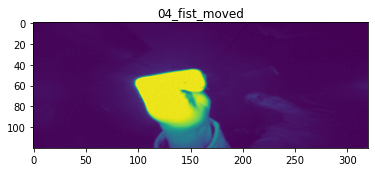

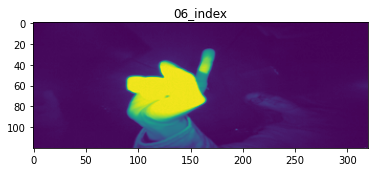

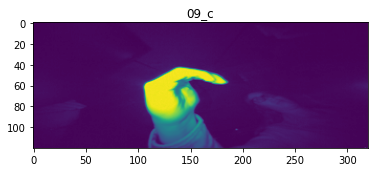

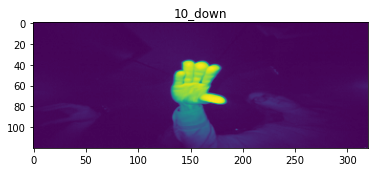

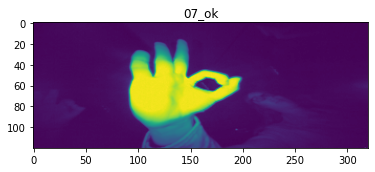

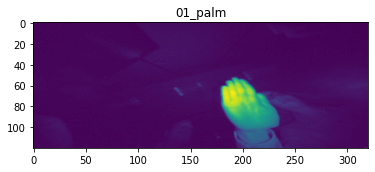

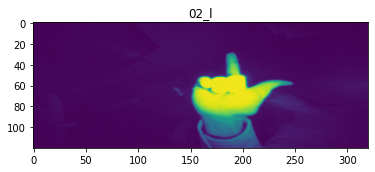

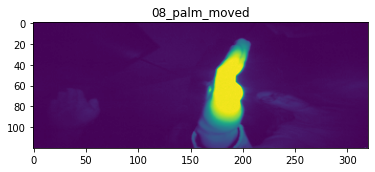

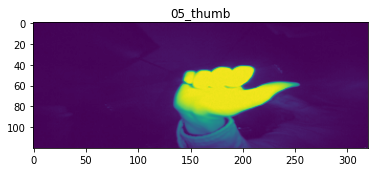

In [25]:
from random import randint
for i in range(0, 10):
    plt.imshow(x_data[i*200 , :, :])
    plt.title(reverselookup[y_data[i*200 ,0]])
    plt.show()

In [26]:
import keras
from keras.utils import to_categorical
y_data = to_categorical(y_data)
print(x_data.shape)

(20000, 120, 320)


In [27]:
x_data = x_data.reshape((datacount, 120, 320, 1))
x_data /= 255

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_further,y_train,y_further = train_test_split(x_data,y_data,test_size = 0.2)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.5)
print(x_train.shape)
print(x_validate.shape)
print(x_test.shape)

(16000, 120, 320, 1)
(2000, 120, 320, 1)
(2000, 120, 320, 1)


In [29]:
from keras import layers
from keras import models
from keras import optimizers

Base model

In [30]:
model0=models.Sequential()
model0.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(120, 320,1))) 
model0.add(layers.MaxPooling2D((2, 2)))
model0.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model0.add(layers.MaxPooling2D((2, 2)))
model0.add(layers.Flatten())
model0.add(layers.Dense(128, activation='relu'))
model0.add(layers.Dense(10, activation='softmax'))
model0.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 58, 158, 32)       832       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 29, 79, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 27, 77, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 38, 64)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 31616)             0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [31]:
model0.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model0_history = model0.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(x_validate, y_validate))

Epoch 1/10
250/250 [==============================] - 3s 9ms/step - loss: 0.2226 - accuracy: 0.9314 - val_loss: 0.0267 - val_accuracy: 0.9920
Epoch 2/10
250/250 [==============================] - 2s 8ms/step - loss: 0.0057 - accuracy: 0.9985 - val_loss: 0.0030 - val_accuracy: 0.9990
Epoch 3/10
250/250 [==============================] - 2s 8ms/step - loss: 2.6483e-04 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 0.9995
Epoch 4/10
250/250 [==============================] - 2s 8ms/step - loss: 3.7706e-05 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 0.9995
Epoch 5/10
250/250 [==============================] - 2s 8ms/step - loss: 1.9267e-05 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 0.9995
Epoch 6/10
250/250 [==============================] - 2s 8ms/step - loss: 1.3402e-05 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 0.9995
Epoch 7/10
250/250 [==============================] - 2s 8ms/step - loss: 9.9906e-06 - accuracy: 1.0000 - val_loss: 0.0012 - val_acc

In [36]:
def modelHistoryPlot(model_history):
  plt.plot(model_history.history['loss'])
  plt.plot(model_history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.legend(['loss', 'val_loss'])
  plt.show()

  plt.plot(model_history.history['accuracy'])
  plt.plot(model_history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('Epochs')
  plt.legend(['accuracy', 'val_accuracy'])
  plt.show()

  print("Training Accuracy", min(model_history.history['accuracy']))
  print("Validation Accuracy", min(model_history.history['val_accuracy']))

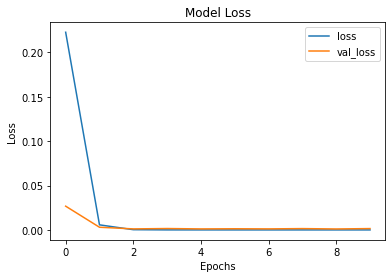

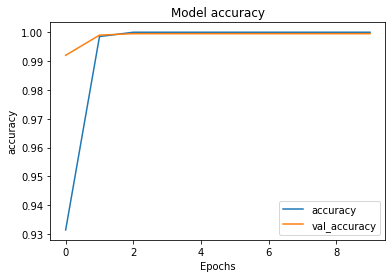

Training Accuracy 0.9314374923706055
Validation Accuracy 0.9919999837875366


In [39]:
modelHistoryPlot(model0_history)

In [41]:
#testing
[loss, accuracy] = model0.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(accuracy))

63/63 [==============================] - 0s 4ms/step - loss: 0.0029 - accuracy: 0.9995
Accuracy:0.9994999766349792


First Model

In [42]:
model1=models.Sequential()
model1.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(120, 320,1))) 
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

Epoch 1/10
500/500 [==============================] - 4s 6ms/step - loss: 0.1788 - accuracy: 0.9452 - val_loss: 0.0171 - val_accuracy: 0.9945
Epoch 2/10
500/500 [==============================] - 2s 5ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0015 - val_accuracy: 0.9995
Epoch 3/10
500/500 [==============================] - 3s 5ms/step - loss: 1.0374e-04 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 0.9995
Epoch 4/10
500/500 [==============================] - 2s 5ms/step - loss: 2.3271e-05 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 0.9995
Epoch 5/10
500/500 [==============================] - 2s 5ms/step - loss: 1.2859e-05 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 0.9995
Epoch 6/10
500/500 [==============================] - 2s 5ms/step - loss: 9.2273e-06 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 0.9995
Epoch 7/10
500/500 [==============================] - 2s 5ms/step - loss: 6.4410e-06 - accuracy: 1.0000 - val_loss: 0.0023 - val_acc

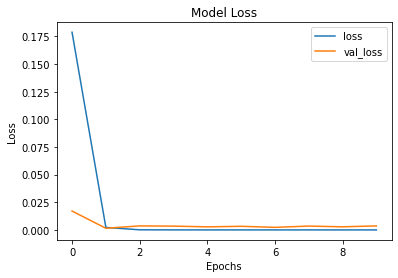

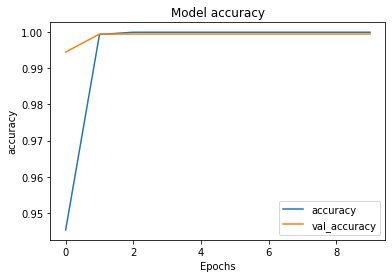

Training Accuracy 0.9452499747276306
Validation Accuracy 0.9944999814033508


In [43]:
model1.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model1_history = model1.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(x_validate, y_validate))

modelHistoryPlot(model1_history)

In [44]:
#testing
[loss, accuracy] = model1.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(accuracy))

63/63 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 0.9995
Accuracy:0.9994999766349792


Second Model

Epoch 1/10
125/125 [==============================] - 2s 16ms/step - loss: 0.3793 - accuracy: 0.8800 - val_loss: 0.0223 - val_accuracy: 0.9950
Epoch 2/10
125/125 [==============================] - 2s 13ms/step - loss: 0.0094 - accuracy: 0.9984 - val_loss: 0.0057 - val_accuracy: 0.9995
Epoch 3/10
125/125 [==============================] - 2s 13ms/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0114 - val_accuracy: 0.9965
Epoch 4/10
125/125 [==============================] - 2s 13ms/step - loss: 9.8317e-04 - accuracy: 0.9999 - val_loss: 0.0153 - val_accuracy: 0.9955
Epoch 5/10
125/125 [==============================] - 2s 13ms/step - loss: 0.0056 - accuracy: 0.9987 - val_loss: 0.0043 - val_accuracy: 0.9990
Epoch 6/10
125/125 [==============================] - 2s 13ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.0103 - val_accuracy: 0.9985
Epoch 7/10
125/125 [==============================] - 2s 13ms/step - loss: 0.0036 - accuracy: 0.9991 - val_loss: 0.0055 - val_accuracy: 0.

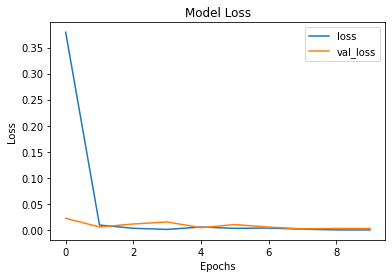

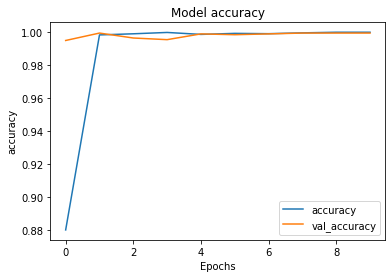

Training Accuracy 0.8799999952316284
Validation Accuracy 0.9950000047683716
63/63 [==============================] - 0s 4ms/step - loss: 0.0026 - accuracy: 0.9995
Accuracy:0.9994999766349792


In [47]:
model2=models.Sequential()
model2.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(120, 320,1))) 
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

model2.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model2_history = model2.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1, validation_data=(x_validate, y_validate))

modelHistoryPlot(model2_history)

#testing
[loss, accuracy] = model2.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(accuracy))

Third Model

Epoch 1/10
125/125 [==============================] - 2s 16ms/step - loss: 2.4210 - accuracy: 0.0977 - val_loss: 2.3058 - val_accuracy: 0.1000
Epoch 2/10
125/125 [==============================] - 2s 13ms/step - loss: 2.3053 - accuracy: 0.0967 - val_loss: 2.3046 - val_accuracy: 0.1110
Epoch 3/10
125/125 [==============================] - 2s 13ms/step - loss: 2.3059 - accuracy: 0.0965 - val_loss: 2.3053 - val_accuracy: 0.0955
Epoch 4/10
125/125 [==============================] - 2s 13ms/step - loss: 2.3065 - accuracy: 0.0988 - val_loss: 2.3079 - val_accuracy: 0.0955
Epoch 5/10
125/125 [==============================] - 2s 13ms/step - loss: 2.3048 - accuracy: 0.1010 - val_loss: 2.3046 - val_accuracy: 0.0940
Epoch 6/10
125/125 [==============================] - 2s 13ms/step - loss: 2.3063 - accuracy: 0.0946 - val_loss: 2.3054 - val_accuracy: 0.1055
Epoch 7/10
125/125 [==============================] - 2s 13ms/step - loss: 2.3058 - accuracy: 0.0970 - val_loss: 2.3032 - val_accuracy: 0.0985

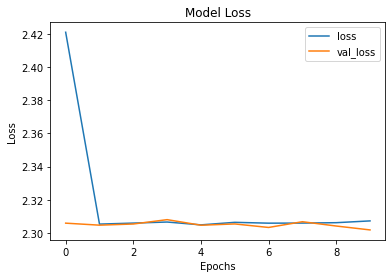

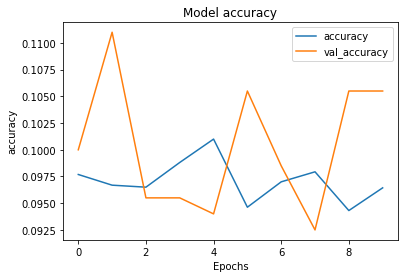

Training Accuracy 0.09431249648332596
Validation Accuracy 0.0925000011920929
63/63 [==============================] - 0s 4ms/step - loss: 2.3032 - accuracy: 0.1055
Accuracy:0.1054999977350235


In [61]:
model3=models.Sequential()
model3.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='sigmoid', input_shape=(120, 320,1))) 
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(128, activation='sigmoid'))
model3.add(layers.Dense(10, activation='softmax'))

model3.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model3_history = model3.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1, validation_data=(x_validate, y_validate))

modelHistoryPlot(model3_history)

#testing
[loss, accuracy] = model3.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(accuracy))

Fourth model

Epoch 1/10
500/500 [==============================] - 3s 6ms/step - loss: 2.3491 - accuracy: 0.0961 - val_loss: 2.3072 - val_accuracy: 0.1000
Epoch 2/10
500/500 [==============================] - 3s 5ms/step - loss: 2.3108 - accuracy: 0.0993 - val_loss: 2.3106 - val_accuracy: 0.0940
Epoch 3/10
500/500 [==============================] - 3s 5ms/step - loss: 2.3103 - accuracy: 0.0985 - val_loss: 2.3089 - val_accuracy: 0.0955
Epoch 4/10
500/500 [==============================] - 3s 5ms/step - loss: 2.3099 - accuracy: 0.1004 - val_loss: 2.3165 - val_accuracy: 0.0985
Epoch 5/10
500/500 [==============================] - 3s 5ms/step - loss: 2.3095 - accuracy: 0.1053 - val_loss: 2.3145 - val_accuracy: 0.0925
Epoch 6/10
500/500 [==============================] - 3s 5ms/step - loss: 2.3096 - accuracy: 0.1010 - val_loss: 2.3118 - val_accuracy: 0.0955
Epoch 7/10
500/500 [==============================] - 3s 5ms/step - loss: 2.3090 - accuracy: 0.1041 - val_loss: 2.3102 - val_accuracy: 0.0985
Epoch 

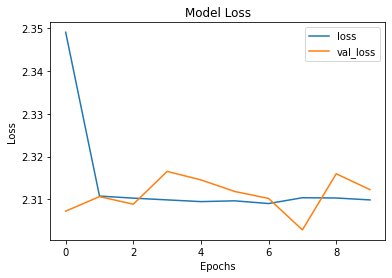

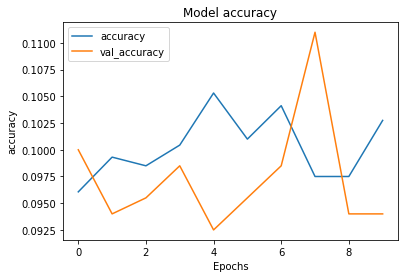

Training Accuracy 0.09606249630451202
Validation Accuracy 0.0925000011920929
63/63 [==============================] - 0s 4ms/step - loss: 2.3103 - accuracy: 0.1030
Accuracy:0.10300000011920929


In [62]:
model4=models.Sequential()
model4.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='sigmoid', input_shape=(120, 320,1))) 
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Flatten())
model4.add(layers.Dense(128, activation='sigmoid'))
model4.add(layers.Dense(10, activation='softmax'))

model4.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model4_history = model4.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(x_validate, y_validate))

modelHistoryPlot(model4_history)

#testing
[loss, accuracy] = model4.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(accuracy))

Fifth model 

Epoch 1/10
250/250 [==============================] - 3s 9ms/step - loss: 2.3565 - accuracy: 0.0964 - val_loss: 2.3049 - val_accuracy: 0.0925
Epoch 2/10
250/250 [==============================] - 2s 8ms/step - loss: 2.3075 - accuracy: 0.0966 - val_loss: 2.3069 - val_accuracy: 0.0985
Epoch 3/10
250/250 [==============================] - 2s 8ms/step - loss: 2.3074 - accuracy: 0.1009 - val_loss: 2.3167 - val_accuracy: 0.1025
Epoch 4/10
250/250 [==============================] - 2s 8ms/step - loss: 2.3077 - accuracy: 0.0988 - val_loss: 2.3088 - val_accuracy: 0.0925
Epoch 5/10
250/250 [==============================] - 2s 8ms/step - loss: 2.3076 - accuracy: 0.0994 - val_loss: 2.3077 - val_accuracy: 0.1025
Epoch 6/10
250/250 [==============================] - 2s 8ms/step - loss: 2.3078 - accuracy: 0.0977 - val_loss: 2.3061 - val_accuracy: 0.0985
Epoch 7/10
250/250 [==============================] - 2s 8ms/step - loss: 2.3070 - accuracy: 0.0976 - val_loss: 2.3033 - val_accuracy: 0.1025
Epoch 

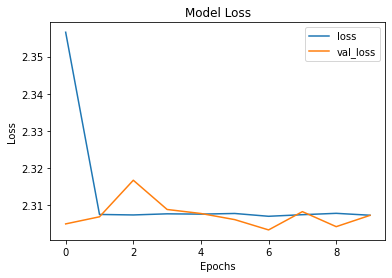

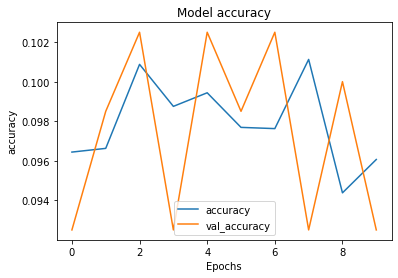

Training Accuracy 0.09437499940395355
Validation Accuracy 0.0925000011920929
63/63 [==============================] - 0s 4ms/step - loss: 2.3051 - accuracy: 0.0925
Accuracy:0.0925000011920929


In [63]:
model5=models.Sequential()
model5.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='sigmoid', input_shape=(120, 320,1))) 
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Flatten())
model5.add(layers.Dense(128, activation='sigmoid'))
model5.add(layers.Dense(10, activation='softmax'))

model5.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model5_history = model5.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(x_validate, y_validate))

modelHistoryPlot(model5_history)

#testing
[loss, accuracy] = model5.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(accuracy))

Sixth model

Epoch 1/10
250/250 [==============================] - 3s 9ms/step - loss: 0.3024 - accuracy: 0.9164 - val_loss: 0.0141 - val_accuracy: 0.9985
Epoch 2/10
250/250 [==============================] - 2s 8ms/step - loss: 0.0062 - accuracy: 0.9996 - val_loss: 0.0075 - val_accuracy: 0.9985
Epoch 3/10
250/250 [==============================] - 2s 8ms/step - loss: 0.0018 - accuracy: 0.9999 - val_loss: 0.0033 - val_accuracy: 0.9995
Epoch 4/10
250/250 [==============================] - 2s 8ms/step - loss: 8.0384e-04 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 0.9995
Epoch 5/10
250/250 [==============================] - 2s 8ms/step - loss: 4.7428e-04 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 0.9995
Epoch 6/10
250/250 [==============================] - 2s 8ms/step - loss: 3.3811e-04 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 0.9995
Epoch 7/10
250/250 [==============================] - 2s 8ms/step - loss: 2.5184e-04 - accuracy: 1.0000 - val_loss: 0.0032 - val_accurac

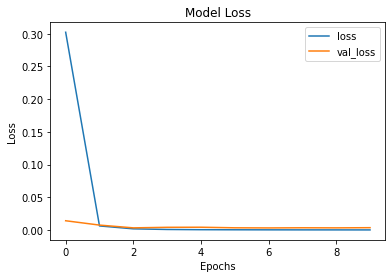

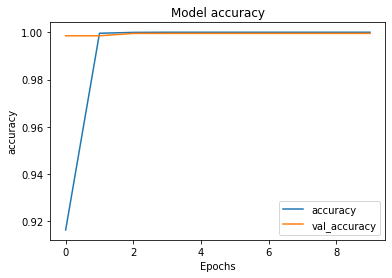

Training Accuracy 0.9163749814033508
Validation Accuracy 0.9984999895095825
63/63 [==============================] - 0s 4ms/step - loss: 6.6072e-04 - accuracy: 1.0000
Accuracy:1.0


In [64]:
model6=models.Sequential()
model6.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='tanh', input_shape=(120, 320,1))) 
model6.add(layers.MaxPooling2D((2, 2)))
model6.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model6.add(layers.MaxPooling2D((2, 2)))
model6.add(layers.Flatten())
model6.add(layers.Dense(128, activation='tanh'))
model6.add(layers.Dense(10, activation='softmax'))

model6.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model6_history = model6.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(x_validate, y_validate))

modelHistoryPlot(model6_history)

#testing
[loss, accuracy] = model6.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(accuracy))

Seventh model

Epoch 1/10
500/500 [==============================] - 3s 6ms/step - loss: 0.1906 - accuracy: 0.9460 - val_loss: 0.0154 - val_accuracy: 0.9970
Epoch 2/10
500/500 [==============================] - 3s 5ms/step - loss: 0.0064 - accuracy: 0.9988 - val_loss: 0.0216 - val_accuracy: 0.9945
Epoch 3/10
500/500 [==============================] - 3s 5ms/step - loss: 0.0014 - accuracy: 0.9999 - val_loss: 0.0018 - val_accuracy: 0.9995
Epoch 4/10
500/500 [==============================] - 3s 5ms/step - loss: 6.8529e-04 - accuracy: 0.9999 - val_loss: 0.0020 - val_accuracy: 0.9995
Epoch 5/10
500/500 [==============================] - 3s 5ms/step - loss: 2.0096e-04 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 0.9995
Epoch 6/10
500/500 [==============================] - 3s 5ms/step - loss: 1.2952e-04 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 0.9995
Epoch 7/10
500/500 [==============================] - 3s 5ms/step - loss: 9.2354e-05 - accuracy: 1.0000 - val_loss: 0.0021 - val_accurac

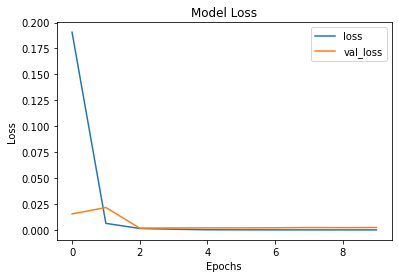

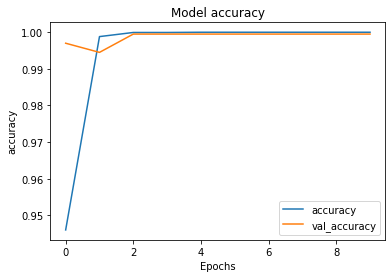

Training Accuracy 0.9459999799728394
Validation Accuracy 0.9944999814033508
63/63 [==============================] - 0s 4ms/step - loss: 6.4728e-04 - accuracy: 0.9995
Accuracy:0.9994999766349792


In [65]:
model7=models.Sequential()
model7.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='tanh', input_shape=(120, 320,1))) 
model7.add(layers.MaxPooling2D((2, 2)))
model7.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model7.add(layers.MaxPooling2D((2, 2)))
model7.add(layers.Flatten())
model7.add(layers.Dense(128, activation='tanh'))
model7.add(layers.Dense(10, activation='softmax'))

model7.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model7_history = model7.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(x_validate, y_validate))

modelHistoryPlot(model7_history)

#testing
[loss, accuracy] = model7.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(accuracy))

Eighth model

Epoch 1/10
125/125 [==============================] - 2s 15ms/step - loss: 0.4085 - accuracy: 0.8866 - val_loss: 0.0261 - val_accuracy: 0.9960
Epoch 2/10
125/125 [==============================] - 2s 13ms/step - loss: 0.0115 - accuracy: 0.9989 - val_loss: 0.0083 - val_accuracy: 0.9990
Epoch 3/10
125/125 [==============================] - 2s 13ms/step - loss: 0.0038 - accuracy: 0.9998 - val_loss: 0.0055 - val_accuracy: 0.9995
Epoch 4/10
125/125 [==============================] - 2s 13ms/step - loss: 0.0019 - accuracy: 0.9999 - val_loss: 0.0042 - val_accuracy: 0.9995
Epoch 5/10
125/125 [==============================] - 2s 13ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 0.9990
Epoch 6/10
125/125 [==============================] - 2s 13ms/step - loss: 7.2703e-04 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 0.9995
Epoch 7/10
125/125 [==============================] - 2s 13ms/step - loss: 5.5499e-04 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy

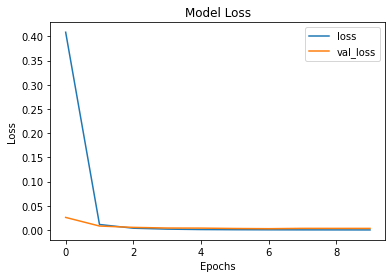

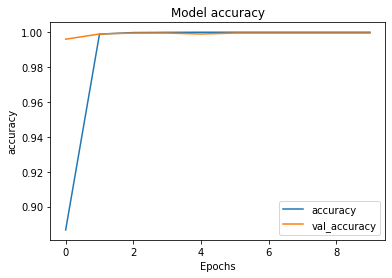

Training Accuracy 0.8866249918937683
Validation Accuracy 0.9959999918937683
63/63 [==============================] - 0s 4ms/step - loss: 8.3023e-04 - accuracy: 1.0000
Accuracy:1.0


In [66]:
model8=models.Sequential()
model8.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='tanh', input_shape=(120, 320,1))) 
model8.add(layers.MaxPooling2D((2, 2)))
model8.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model8.add(layers.MaxPooling2D((2, 2)))
model8.add(layers.Flatten())
model8.add(layers.Dense(128, activation='tanh'))
model8.add(layers.Dense(10, activation='softmax'))

model8.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model8_history = model8.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1, validation_data=(x_validate, y_validate))

modelHistoryPlot(model8_history)

#testing
[loss, accuracy] = model8.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(accuracy))

Ninth model

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 58, 158, 32)       832       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 29, 79, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 27, 77, 64)        18496     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 13, 38, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 11, 36, 64)        36928     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 5, 18, 64)      

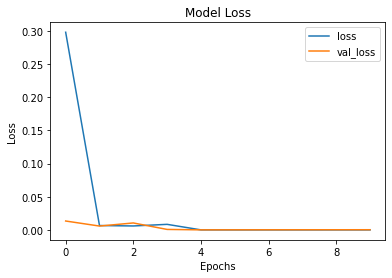

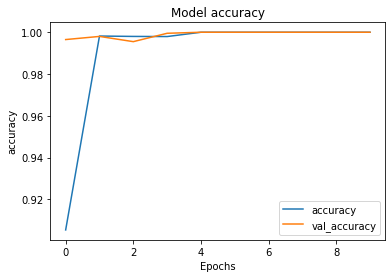

Training Accuracy 0.9053750038146973
Validation Accuracy 0.9955000281333923
63/63 [==============================] - 0s 4ms/step - loss: 0.0068 - accuracy: 0.9995
Accuracy:0.9994999766349792


In [67]:
model9=models.Sequential()
model9.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(120, 320,1))) 
model9.add(layers.MaxPooling2D((2, 2)))
model9.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model9.add(layers.MaxPooling2D((2, 2)))
model9.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model9.add(layers.MaxPooling2D((2, 2)))
model9.add(layers.Flatten())
model9.add(layers.Dense(128, activation='relu'))
model9.add(layers.Dense(10, activation='softmax'))
model9.summary()

model9.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model9_history = model9.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(x_validate, y_validate))

modelHistoryPlot(model9_history)

#testing
[loss, accuracy] = model9.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(accuracy))

Tenth model

Epoch 1/10
250/250 [==============================] - 3s 9ms/step - loss: 0.2348 - accuracy: 0.9300 - val_loss: 0.0154 - val_accuracy: 0.9965
Epoch 2/10
250/250 [==============================] - 2s 8ms/step - loss: 0.0051 - accuracy: 0.9997 - val_loss: 0.0030 - val_accuracy: 0.9995
Epoch 3/10
250/250 [==============================] - 2s 8ms/step - loss: 0.0014 - accuracy: 0.9999 - val_loss: 0.0013 - val_accuracy: 0.9995
Epoch 4/10
250/250 [==============================] - 2s 8ms/step - loss: 6.4325e-04 - accuracy: 1.0000 - val_loss: 9.4731e-04 - val_accuracy: 0.9995
Epoch 5/10
250/250 [==============================] - 2s 8ms/step - loss: 4.2469e-04 - accuracy: 1.0000 - val_loss: 5.7692e-04 - val_accuracy: 1.0000
Epoch 6/10
250/250 [==============================] - 2s 8ms/step - loss: 3.0844e-04 - accuracy: 1.0000 - val_loss: 6.1010e-04 - val_accuracy: 1.0000
Epoch 7/10
250/250 [==============================] - 2s 8ms/step - loss: 2.3198e-04 - accuracy: 1.0000 - val_loss: 3.6536e-

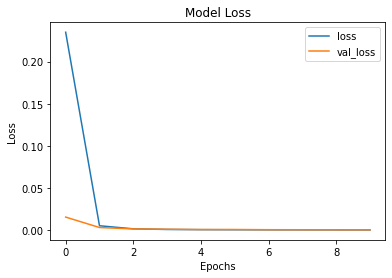

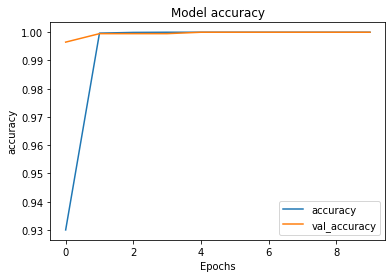

Training Accuracy 0.9300000071525574
Validation Accuracy 0.9965000152587891
63/63 [==============================] - 0s 4ms/step - loss: 5.8818e-04 - accuracy: 1.0000
Accuracy:1.0


In [68]:
model10=models.Sequential()
model10.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='tanh', input_shape=(120, 320,1))) 
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Conv2D(64, (3, 3), activation='tanh')) 
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Conv2D(64, (3, 3), activation='tanh')) 
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Flatten())
model10.add(layers.Dense(128, activation='tanh'))
model10.add(layers.Dense(10, activation='softmax'))

model10.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model10_history = model10.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(x_validate, y_validate))

modelHistoryPlot(model10_history)

#testing
[loss, accuracy] = model10.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(accuracy))